# Plot a CausaNet BIFXML DAG (pyAgrum)

Minimal, robust viewer that loads the BIFXML with pyAgrum and renders it.
- Set `dataset_id` and run the cell.
- If pyAgrum's notebook helpers are unavailable, falls back to Graphviz or writes a `.dot` file.


BIFXML: /vol/bitbucket/fr920/ArgCausalDisco/datasets/causenet_generator/bifxmls/dag_10_nodes_15_edges_semantics_SF.bifxml
Loaded BN: nodes=10,  arcs=17


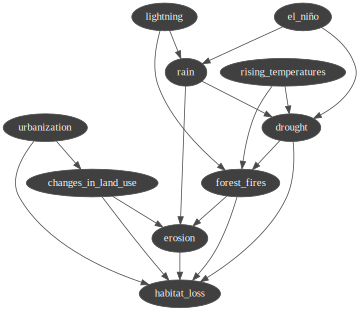

None

digraph "dag_10_nodes_15_edges_semantics_SF" {
  graph [bgcolor=transparent,label="dag_10_nodes_15_edges_semantics_SF"];
  node [style=filled fillcolor="#ffffaa"];

"drought" [comment="0:drought[0,1]"];
"forest_fires" [comment="1:forest_fires[0,1]"];
"habitat_loss" [comment="2:habitat_loss[0,1]"];
"lightning" [comment="3:lightning[0,1]"];
"rain" [comment="4:rain[0,1]"];
"erosion" [comment="5:erosion[0,1]"];
"rising_temperatures" [comment="6:rising_temperatures[0,1]"];
"urbanization" [comment="7:urbanization[0,1]"];
"changes_in_land_use" [comment="8:changes_in_land_use[0,1]"];
"el_niño" [comment="9:el_niño[0,1]"];

  "drought" -> "forest_fires";
  "drought" -> "habitat_loss";
  "forest_fires" -> "habitat_loss";
  "forest_fires" -> "erosion";
  "lightning" -> "forest_fires";
  "lightning" -> "rain";
  "rain" -> "drought";
  "rain" -> "erosion";
  "erosion" -> "habitat_loss";
  "rising_temperatures" -> "forest_fires";
  "rising_temperatures" -> "drought";
  "urbanization" -> "changes_in_l

In [8]:
from pathlib import Path
import pyagrum as gum

# Optional inline helpers
try:
    import pyagrum.lib.notebook as gnb  # type: ignore
    _PYAGRUM_NB = True
except Exception:
    _PYAGRUM_NB = False

try:
    from graphviz import Source  # type: ignore
    _GRAPHVIZ = True
except Exception:
    _GRAPHVIZ = False

REPO_ROOT = Path.cwd().resolve().parent
BIFXML_DIR = REPO_ROOT / 'datasets' / 'causenet_generator' / 'bifxmls'

# Choose the DAG to render
dataset_id = 'dag_10_nodes_15_edges_semantics_SF'  # change as needed
bif_path = (BIFXML_DIR / f'{dataset_id}.bifxml').resolve()
print('BIFXML:', bif_path)
if not bif_path.exists():
    raise FileNotFoundError(f'No such BIFXML: {bif_path}')

# Load with pyAgrum
bn = gum.loadBN(str(bif_path))
### count nodes/arcs
print(f'Loaded BN: nodes={bn.size()},  arcs={len(bn.arcs())}')

# Prefer pyAgrum notebook renderer
if _PYAGRUM_NB:
    display(gnb.showBN(bn))
elif _GRAPHVIZ:
    # Fallback: render DOT inline with graphviz
    display(Source(bn.toDot()))
else:
    # Last resort: write DOT to a file
    out_dot = Path.cwd() / f'{dataset_id}.dot'
    out_dot.write_text(bn.toDot(), encoding='utf-8')
    print('Wrote DOT to:', out_dot)
    print('Render with: dot -Tpng', out_dot.name, '-o', f'{dataset_id}.png')

# Optional: print DOT strings
print(bn.toDot())
print(bn.dag().toDot())
